In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

np.random.seed(42)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
from preprocessing.getdata import *
df = get_csvdata()


In [25]:
dfTrain, dfTest, y_train, y_test = train_test_split(df, df['CDR'], stratify = df['CDR'], random_state=42)

X_test = get_slices(dfTest['ID'], dim=2, m=90)
X_test = X_test.reshape((len(X_test),-1))

d=2
N=5

X_train = get_slices(dfTrain['ID'], N=N, d=d, dim=2, m=90)
y_train = y_train.repeat(1+2*N)
X_train = X_train.reshape((len(X_train),-1))

In [4]:
data = get_3D_data(df['ID'])
X_train, X_test, y_train, y_test = train_test_split(data, df['CDR'], stratify = df['CDR'], random_state=42)
del data 

X_train = X_train.reshape((len(X_train),-1))
X_test = X_test.reshape((len(X_test),-1))

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
pca = PCA(n_components=100, svd_solver='randomized')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

: 

: 

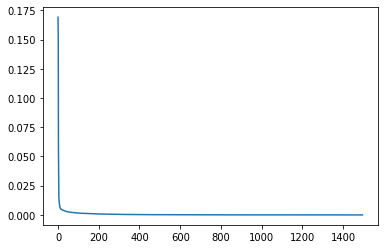

In [28]:
plt.plot(pca.explained_variance_ratio_)

In [36]:
model = SVC()
model.fit(X_train_pca, y_train)

SVC()

In [32]:
print(X_train.shape)
print(X_train_pca.shape)

(1496, 36608)
(1496, 1496)


In [33]:
param_grid = {'C': [0.1,1, 10, 100], 
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']}

gs = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, verbose=3, scoring='accuracy')

gs.fit(X_train_pca, y_train)
gs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.573 total time=   3.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.448 total time=   3.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.609 total time=   3.8s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   3.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   3.9s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   4.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   4.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.498 total time=   4.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.520 total time=   2.2s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.492 total time=   2.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.525 total time=   2.2s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [34]:
model = gs.best_estimator_

In [37]:
y_pred = model.predict(X_test_pca)
acc = accuracy_score(y_test, y_pred)
print(acc)
accuracy_score(y_train, model.predict(X_train_pca))

0.6086956521739131


0.9973262032085561

accuracy:  0.57
recall:  0.52
precision:  0.57


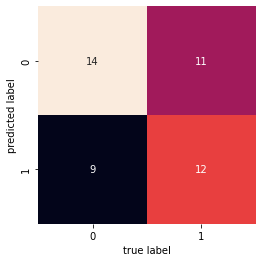

In [8]:
# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred).round(2))
print('recall: ' , recall_score(y_test, y_pred).round(2))
print('precision: ' , precision_score(y_test, y_pred).round(2))